In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data  = pd.read_csv("/content/avocado.csv")
df = pd.DataFrame(data)
df.head()

,observation_id,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   observation_id  18249 non-null  int64  
 1   Date            18249 non-null  object 
 2   AveragePrice    18249 non-null  float64
 3   Total Volume    18249 non-null  float64
 4   4046            18249 non-null  float64
 5   4225            18249 non-null  float64
 6   4770            18249 non-null  float64
 7   Total Bags      18249 non-null  float64
 8   Small Bags      18249 non-null  float64
 9   Large Bags      18249 non-null  float64
 10  XLarge Bags     18249 non-null  float64
 11  type            18249 non-null  object 
 12  year            18249 non-null  int64  
 13  region          18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [ ]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [ ]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [ ]:
df.describe()

,observation_id,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [ ]:
#rata-rata harga di setiap wilayah berdasarkan type
average_price_by_type_region = df.groupby(['region', 'type'])['AveragePrice'].mean()
result = average_price_by_type_region.reset_index()
result_sorted = result.sort_values(by='AveragePrice', ascending=False)
result_organic = result_sorted[result_sorted['type'] == 'organic']
result_conventional = result_sorted[result_sorted['type'] == 'conventional']
merged_result = pd.merge(result_organic, result_conventional, on='region', suffixes=('_organic', '_conventional'))
merged_result

,region,type_organic,AveragePrice_organic,type_conventional,AveragePrice_conventional
0,HartfordSpringfield,organic,2.229231,conventional,1.408047
1,SanFrancisco,organic,2.211243,conventional,1.397160
2,NewYork,organic,2.053018,conventional,1.402130
3,Sacramento,organic,1.969172,conventional,1.273964
4,Charlotte,organic,1.936982,conventional,1.275089
5,RaleighGreensboro,organic,1.883136,conventional,1.227101
6,Philadelphia,organic,1.867929,conventional,1.396331
7,Northeast,organic,1.859408,conventional,1.344438
8,Jacksonville,organic,1.828284,conventional,1.193609
9,Orlando,organic,1.797988,conventional,1.214438


In [ ]:
#filter data untuk mencari total volume dan total bags penjualan type organic
type_organic = df[df['type']=='organic']
df['Date'] = pd.to_datetime(df['Date'])
grouped_data = type_organic.groupby(['Date', 'region']).agg({'Total Volume': 'sum', 'Total Bags': 'sum'}).reset_index()
grouped_data

,Date,region,Total Volume,Total Bags
0,2015-01-04,Albany,1373.95,1162.65
1,2015-01-04,Atlanta,3846.69,1408.19
2,2015-01-04,BaltimoreWashington,19137.28,3881.69
3,2015-01-04,Boise,1505.12,374.35
4,2015-01-04,Boston,2192.13,1244.04
...,...,...,...,...
9118,2018-03-25,Syracuse,14503.47,14276.15
9119,2018-03-25,Tampa,10028.49,9117.12
9120,2018-03-25,TotalUS,1559967.20,1093861.09
9121,2018-03-25,West,271723.08,166747.85


In [ ]:
#filter untuk menampilkan data di 4 wilayah
selected_regions = ['Boston', 'Pittsburgh', 'SouthCarolina', 'Southeast']
df_organic_selected_regions = type_organic[type_organic['region'].isin(selected_regions)]
df_organic_selected_regions

,observation_id,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9334,0,2015-12-27,1.48,7986.08,9.65,775.99,39.82,7160.62,7149.89,10.73,0.0,organic,2015,Boston
9335,1,2015-12-20,1.41,7939.48,26.64,511.07,61.76,7340.01,7340.01,0.00,0.0,organic,2015,Boston
9336,2,2015-12-13,1.55,8563.97,18.24,434.18,251.75,7859.80,7848.99,10.81,0.0,organic,2015,Boston
9337,3,2015-12-06,1.29,8286.37,37.55,466.83,0.00,7781.99,7781.99,0.00,0.0,organic,2015,Boston
9338,4,2015-11-29,1.28,6869.81,11.37,388.10,0.00,6470.34,6470.34,0.00,0.0,organic,2015,Boston
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18160,7,2018-02-04,1.44,96702.50,1589.03,16827.96,118.89,78166.62,72587.74,5578.88,0.0,organic,2018,Southeast
18161,8,2018-01-28,1.55,103243.02,1886.12,21288.86,121.72,79946.32,63894.49,16051.83,0.0,organic,2018,Southeast
18162,9,2018-01-21,1.48,105688.73,1379.60,16329.87,114.48,87864.78,71192.79,16671.99,0.0,organic,2018,Southeast
18163,10,2018-01-14,1.42,106345.74,1053.73,16596.47,158.66,88536.88,78949.63,9587.25,0.0,organic,2018,Southeast


In [ ]:
#agregasi untuk melihat total volume dan total bags
sales = df_organic_selected_regions.groupby('region').agg({'Total Volume': 'sum', 'Total Bags': 'sum'}).reset_index()
sales

,region,Total Volume,Total Bags
0,Boston,2373546.69,2175131.47
1,Pittsburgh,974440.89,837372.98
2,SouthCarolina,1505292.99,883680.57
3,Southeast,10039655.90,6233623.78


# Visualisasi

In [ ]:
# Gunakan .loc untuk membuat salinan data yang independen
df_organic_Southeast = df.loc[(df['type'] == 'organic') & (df['region'] == 'Southeast')].copy()

# Tambahkan kolom 'Month' sebagai bulan pengamatan
df_organic_Southeast['Month'] = df_organic_Southeast['Date'].dt.month

# Gunakan Plotly Express untuk membuat line chart
fig = px.line(df_organic_Southeast, x='Date', y='Total Volume', markers=True, title='Penjualan Type Organic per Bulan di Southeast')
fig.show()

In [ ]:
df_organic_Boston = df.loc[(df['type'] == 'organic') & (df['region'] == 'Boston')].copy()

# Tambahkan kolom 'Month' sebagai bulan pengamatan
df_organic_Boston['Month'] = df_organic_Boston['Date'].dt.month

# Gunakan Plotly Express untuk membuat line chart
fig = px.line(df_organic_Boston, x='Date', y='Total Volume', markers=True, title='Penjualan Type Organic per Bulan di Boston')
fig.show()

In [ ]:
df_organic_Pittsburgh = df.loc[(df['type'] == 'organic') & (df['region'] == 'Pittsburgh')].copy()

# Tambahkan kolom 'Month' sebagai bulan pengamatan
df_organic_Pittsburgh['Month'] = df_organic_Pittsburgh['Date'].dt.month

# Gunakan Plotly Express untuk membuat line chart
fig = px.line(df_organic_Pittsburgh, x='Date', y='Total Volume', markers=True, title='Penjualan Type Organic per Bulan di Pittsburgh')
fig.show()

In [ ]:
df_organic_SouthCarolina = df.loc[(df['type'] == 'organic') & (df['region'] == 'SouthCarolina')].copy()

# Tambahkan kolom 'Month' sebagai bulan pengamatan
df_organic_SouthCarolina['Month'] = df_organic_SouthCarolina['Date'].dt.month

# Gunakan Plotly Express untuk membuat line chart
fig = px.line(df_organic_SouthCarolina, x='Date', y='Total Volume', markers=True, title='Penjualan Type Organic per Bulan di SouthCarolina')
fig.show()

In [ ]:
ttl_volume_bags = df_organic_selected_regions.groupby('region').agg({'Total Volume': 'sum', 'Total Bags': 'sum'}).reset_index()
fig = px.bar(ttl_volume_bags, x='region', y=['Total Volume', 'Total Bags'],
             title='Total Volume and Total Bags by Region (Organic)',
             labels={'value': 'Count', 'variable': 'Metric'},
             color='variable')
fig.show()

# cek korelasi

In [ ]:
df2 = df.drop(['Date','region','4046','4225','4770','observation_id','year'], axis = 1)
df2['type'] = df2['type'].replace({'conventional': 0, 'organic': 1})

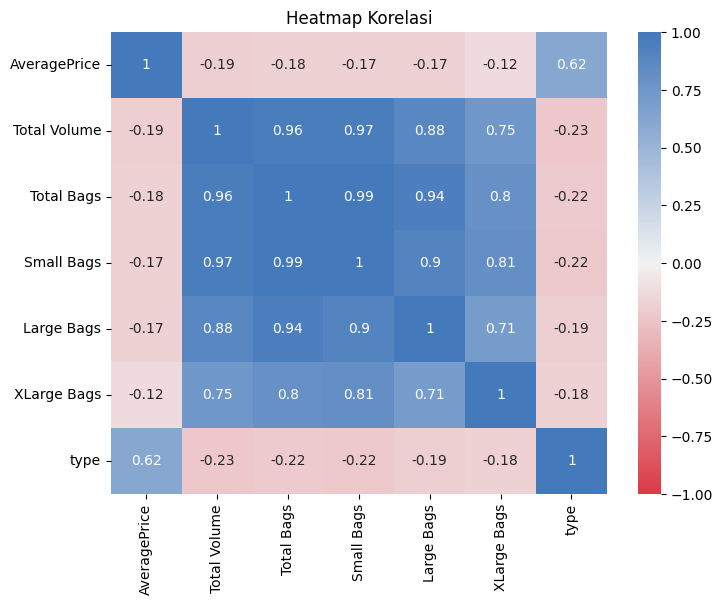

In [ ]:
# Menghitung korelasi
corr = df2.corr()

# Membuat visualisasi korelasi dengan heatmap
plt.figure(figsize=(8, 6))
warna = sns.diverging_palette(10, 250, as_cmap=True)

# Memetakan nilai korelasi di setiap sel
sns.heatmap(corr, annot=True, cmap=warna, vmin=-1, vmax=1)
plt.title("Heatmap Korelasi")
plt.show()

# modeling

logistic regresi

In [ ]:
x = df2.drop('type', axis=1)
y = df2['type']

In [ ]:
#split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

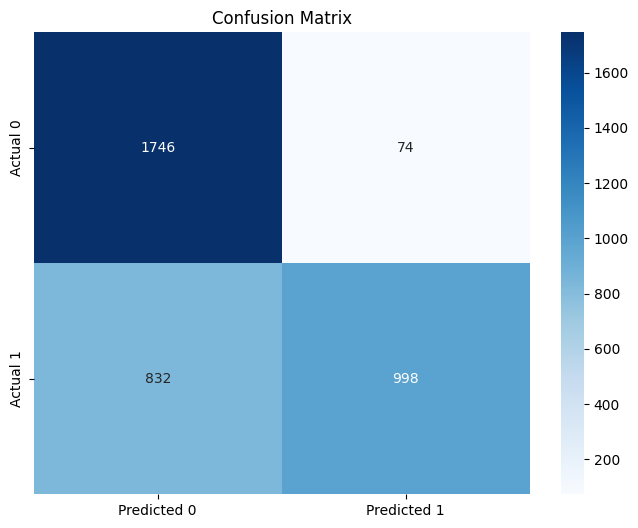

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred_test)

# heatmap confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred_test)
classification_rep = classification_report(y_test, y_pred_test)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:')
print(classification_rep)

Accuracy: 0.7517808219178083
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.96      0.79      1820
           1       0.93      0.55      0.69      1830

    accuracy                           0.75      3650
   macro avg       0.80      0.75      0.74      3650
weighted avg       0.80      0.75      0.74      3650



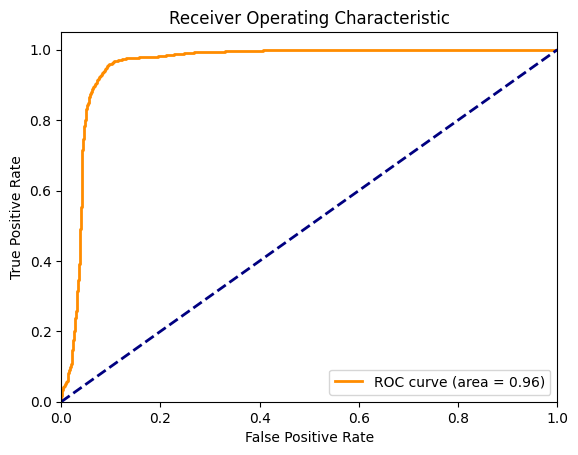

In [ ]:
# Menghitung probabilitas prediksi dari model
y_prob = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

exponensial regresi

In [ ]:
print('Before Predict')
print("="*20)
monthly_totals = df_organic_Boston.groupby('Date').agg({'Total Volume': 'sum', 'Total Bags': 'sum'}).reset_index()
monthly_totals

Before Predict


,Date,Total Volume,Total Bags
0,2015-01-04,2192.13,1244.04
1,2015-01-11,2217.82,1248.93
2,2015-01-18,2209.34,1370.78
3,2015-01-25,1948.28,1184.75
4,2015-02-01,2943.85,1622.73
...,...,...,...
164,2018-02-25,31567.30,29141.59
165,2018-03-04,23890.64,21628.75
166,2018-03-11,30476.66,28353.87
167,2018-03-18,34809.90,32333.11


In [ ]:

# Ekstrak fitur numerik untuk regresi
df_organic_Boston['Days'] = (df_organic_Boston['Date'] - df_organic_Boston['Date'].min()).dt.days

# Pisahkan data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(df_organic_Boston[['Days']], df_organic_Boston['Total Volume'], test_size=0.2, random_state=42)


In [ ]:
# Membuat model regresi eksponensial
model = LinearRegression()
model.fit(X_train, np.log(y_train))  # Menggunakan log dari total volume untuk regresi eksponensial


LinearRegression()

In [ ]:
# Prediksi total volume untuk 3 bulan ke depan
last_date = df_organic_Boston['Date'].max()
future_dates = pd.date_range(start=last_date, periods=4, freq='M')[1:]  # 3 bulan ke depan
future_days = (future_dates - df_organic_Boston['Date'].min()).days.values.reshape(-1, 1)

# Memprediksi total volume untuk 3 bulan ke depan
future_predictions = np.exp(model.predict(future_days))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [ ]:
# Menampilkan hasil prediksi
future_predictions_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted Total Volume': future_predictions
})

print(future_predictions_df)


        Date  Predicted Total Volume
0 2018-04-30            43372.711216
1 2018-05-31            46482.184167
2 2018-06-30            49703.444282


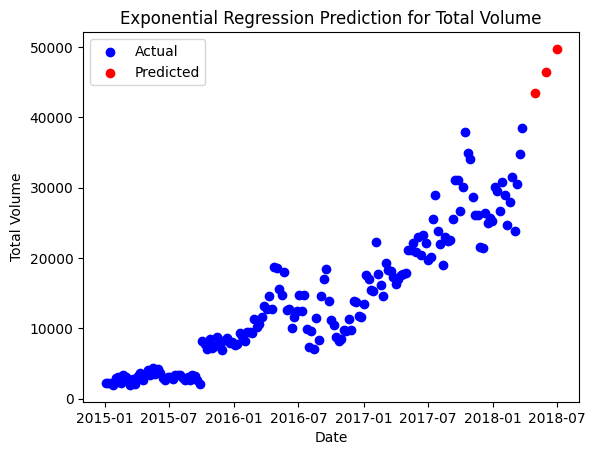

In [ ]:
# Visualisasi hasil prediksi
plt.scatter(df_organic_Boston['Date'], df_organic_Boston['Total Volume'], label='Actual', color='blue')
plt.scatter(future_dates, future_predictions, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Total Volume')
plt.title('Exponential Regression Prediction for Total Volume')
plt.legend()
plt.show()

PROPHET

In [ ]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics

In [ ]:
df_organic_Boston = df.loc[(df['type'] == 'organic') & (df['region'] == 'Southeast')].copy()
#statinarisasi data
df_organic_Boston['stationary_data'] = np.log(df_organic_Boston['Total Volume'])
data_boston = df_organic_Boston[['Date','stationary_data']]

In [ ]:
#sorting berdasarkan tanggal
data_boston = data_boston.copy()
data_boston['Date'] = pd.to_datetime(data_boston['Date'])
result = data_boston.sort_values(by='Date')
result.head()

,Date,stationary_data
11569,2015-01-04,10.217053
11568,2015-01-11,10.072836
11567,2015-01-18,10.155801
11566,2015-01-25,10.077832
11565,2015-02-01,10.465549


In [ ]:
# merubah nama kolom karena untuk menggunakan prophet nama kolom harus ds dan y
result.columns = ('ds','y')
result.tail()

,ds,y
18157,2018-02-25,11.657111
18156,2018-03-04,11.717502
18155,2018-03-11,11.640086
18154,2018-03-18,11.694029
18153,2018-03-25,11.711099


In [ ]:
# membuat model
# menggunakan interval default yaitu 0.8 dan seasonality mode multiplicative karena menggunakan data bulanan
model = Prophet(interval_width=0.8, seasonality_mode='multiplicative')
model_fit = model.fit(result)

In [ ]:
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
254,2018-06-19,11.753277,11.699493,12.109886,11.729967,11.781200,0.012945,0.012945,0.012945,0.012945,0.012945,0.012945,0.0,0.0,0.0,11.905421
255,2018-06-20,11.754747,11.707332,12.123282,11.730621,11.783140,0.013724,0.013724,0.013724,0.013724,0.013724,0.013724,0.0,0.0,0.0,11.916074
256,2018-06-21,11.756217,11.742134,12.122875,11.731624,11.785094,0.014523,0.014523,0.014523,0.014523,0.014523,0.014523,0.0,0.0,0.0,11.926951
257,2018-06-22,11.757688,11.728801,12.140221,11.732397,11.787163,0.015326,0.015326,0.015326,0.015326,0.015326,0.015326,0.0,0.0,0.0,11.937883
258,2018-06-23,11.759158,11.752799,12.168737,11.733118,11.789013,0.016119,0.016119,0.016119,0.016119,0.016119,0.016119,0.0,0.0,0.0,11.948700


In [ ]:
forecast[['ds','yhat']]

,ds,yhat
0,2015-01-04,10.333652
1,2015-01-11,10.342119
2,2015-01-18,10.326211
3,2015-01-25,10.307953
4,2015-02-01,10.304089
...,...,...
254,2018-06-19,11.905421
255,2018-06-20,11.916074
256,2018-06-21,11.926951
257,2018-06-22,11.937883


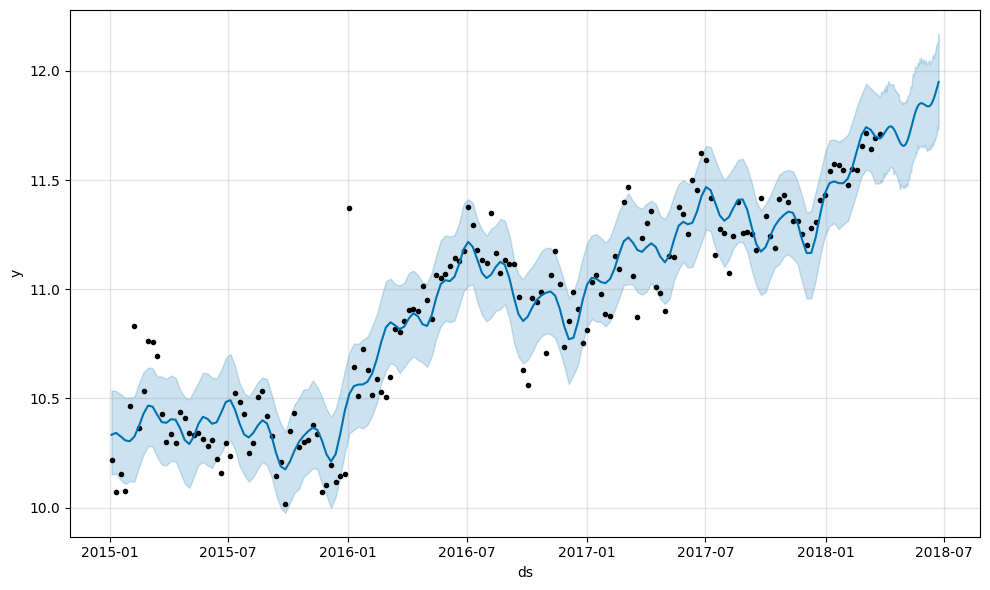

In [ ]:
plot = model.plot(forecast)



*   Garis biru melambangkan hasil modeling forecasting
*   titik - titik melambangkan data real yang ada
*   model dikatakan akurat karena data actual dan forecasting saling dalam chart saling merapat dan membentuk sebuah tren
*   Forecasting / prediksi mmenunjukan bahwa 3 bulan kedepan akan terjadi kenaikan volume penjualan untuk alpukat type organic di wilayah Boston



In [ ]:
fig = px.line(forecast, x='ds', y='yhat', line_shape='linear', title='Prophet Forecast with Actual Data')

# Add actual data points
fig.add_scatter(x=result['ds'], y=result['y'], mode='markers', name='Actual Data', marker=dict(color='red'))

# Show the plot
fig.show()

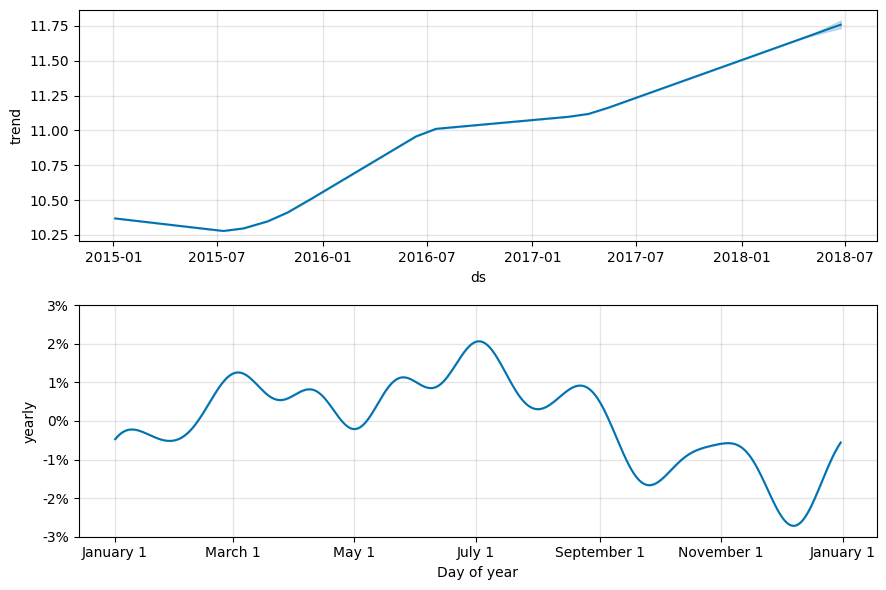

In [ ]:
plot2 = model.plot_components(forecast)

In [ ]:
result_evaluation = cross_validation(model,
                                     horizon='90 days',
                                     period='365 days',
                                     initial='900 days')

# Calculate performance metrics
result_perform = performance_metrics(result_evaluation)

# Display performance metrics
print(result_perform)

  0%|          | 0/1 [00:00<?, ?it/s]

   horizon       mse      rmse       mae      mape     mdape     smape  \
0   6 days  0.000279  0.016695  0.016695  0.001461  0.001461  0.001460   
1  13 days  0.004020  0.063406  0.063406  0.005493  0.005493  0.005508   
2  20 days  0.009697  0.098473  0.098473  0.008508  0.008508  0.008544   
3  27 days  0.009790  0.098946  0.098946  0.008553  0.008553  0.008590   
4  34 days  0.003821  0.061817  0.061817  0.005355  0.005355  0.005369   
5  41 days  0.002084  0.045651  0.045651  0.003977  0.003977  0.003969   
6  48 days  0.002002  0.044747  0.044747  0.003874  0.003874  0.003867   
7  55 days  0.017201  0.131152  0.131152  0.011357  0.011357  0.011293   
8  62 days  0.009330  0.096592  0.096592  0.008286  0.008286  0.008252   
9  69 days  0.004891  0.069938  0.069938  0.005969  0.005969  0.005951   
10 76 days  0.017194  0.131125  0.131125  0.011265  0.011265  0.011202   
11 83 days  0.001556  0.039446  0.039446  0.003373  0.003373  0.003368   
12 90 days  0.000048  0.006937  0.0069

*  Kesimpulan : Model diakatakan akurat ini dibuktikan dengan  melihat mse dan rmse
*  Nilai Mean Squared Error yang rendah atau nilai mean squared error mendekati nol menunjukkan bahwa hasil Forecasting sesuai dengan data aktual dan bisa dijadikan untuk perhitungan peramalan di periode mendatang.
*  Nilai Root Mean Square Error mwndekati nol menjadi patokan untuk mengukur kesalahan hasil prediksi, dimana semakin kecil (mendekati 0) nilai RMSE maka hasil prediksi akan semakin akurat